# utf-8

```
cp python.ipynb ../3.dna.origins/training/chapter7.ipynb
nano ../3.dna.origins/training/_toc.yml
ls -l ../3.dna.origins/training/
mv ../3.dna.origins/training/python.ipynb ../3.dna.origins/training/chapter6.ipynb
cp ../3.dna.origins/training/chapter6.ipynb ../3.dna.origins/training/chapter9.ipynb
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io 
import warnings 
## this sets some style parameters
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"
content = requests.get(url).content.decode('utf-8')
dat = pd.read_csv(io.StringIO(content))
dat.head(4)
dat.shape

(100, 13)

GOLD_Lesions
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: FLAIR, dtype: object

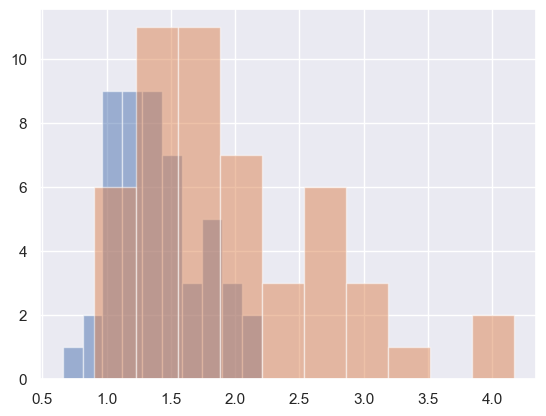

In [3]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .5)

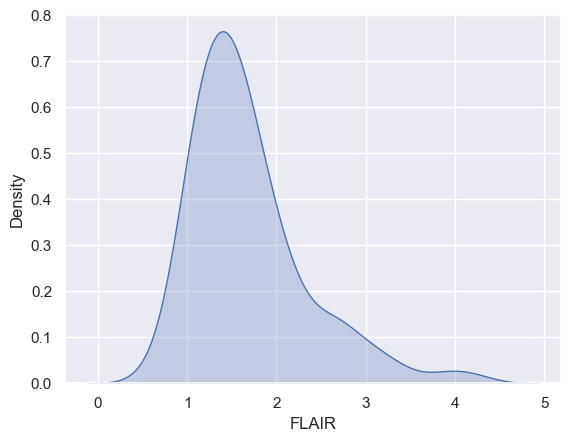

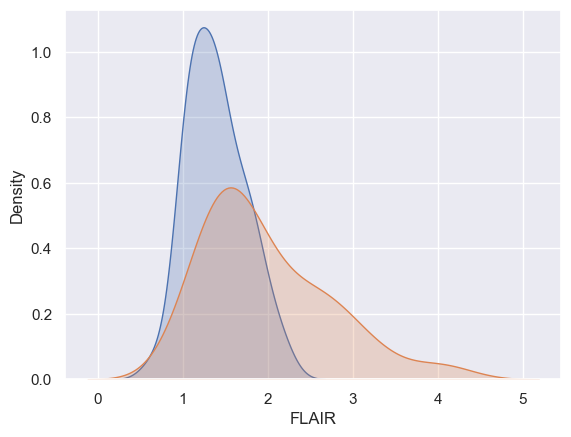

In [4]:
x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR


sns.kdeplot(x2, shade = True, label = 'Marginal')

plt.show()

sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')

plt.show()

In [5]:
x = dat.FLAIR
y = dat.GOLD_Lesions
n = len(x)
trainFraction = .75

## Build a training and testing set
## Prob of being in the train set is trainFraction
sample = np.random.uniform(size = n) < trainFraction

## Get the training and testing sets
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [6]:
## Starting values, just set it to 
## 0 so that it improves on the first
## try
bestAccuracySoFar = 0

for t in np.sort(xtrain):
  ## Strictly greater than the threshold is
  ## our algorithm
  predictions = (xtrain > t)
  accuracy = np.mean(ytrain == predictions)
  if (accuracy > bestAccuracySoFar):
    bestThresholdSoFar = t 
    bestAccuracySoFar = accuracy 

threshold = bestThresholdSoFar
  

In [7]:
## Let's test it out on the test set
testPredictions = (xtest > threshold)

## The test set accuracy
testAccuracy = np.mean(testPredictions == ytest)

## Let's see how it specifically does on the
## set of instances where ytest == 0 and ytest == 1
## The % it gets correct on ytest == 0 is called
## the specificity and the percent correct when 
## ytest == 1 is called the sensitivity.
sub0 = ytest == 0
sub1 = ytest == 1

testSpec = np.mean(ytest[sub0] == testPredictions[sub0])
testSens = np.mean(ytest[sub1] == testPredictions[sub1])

pd.DataFrame({
 'Threshold': threshold,
 'Accuracy': testAccuracy, 
 'Specificity': testSpec, 
 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,1.4632,0.8125,0.727273,1.0


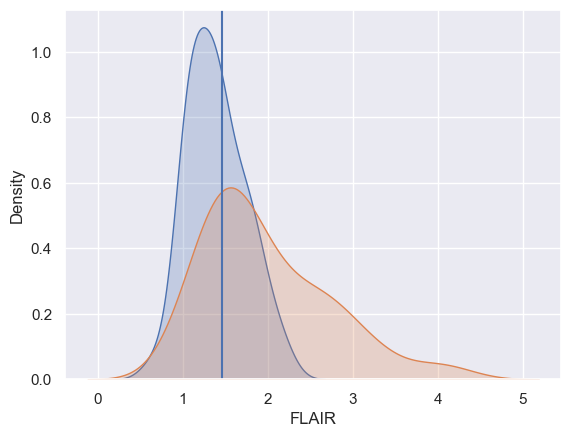

In [8]:
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.axvline(x=threshold)
            
plt.show()

In [9]:
fpr, tpr, thresholds = roc_curve(ytest, xtest)
roc_auc = auc(fpr, tpr)

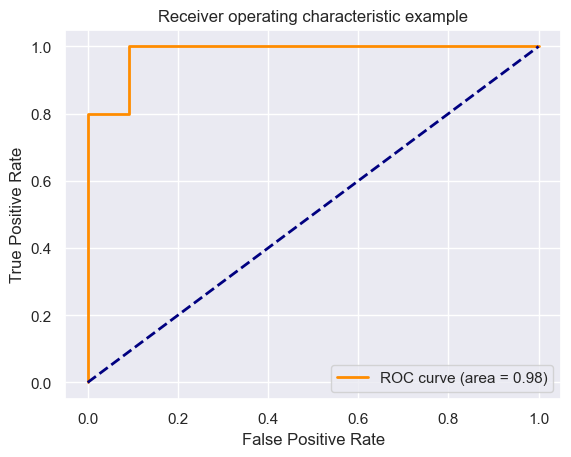

In [10]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io 

In [12]:

url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"
content = requests.get(url).content.decode("utf-8")
dat = pd.read_csv(io.StringIO(content))
dat.head()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0


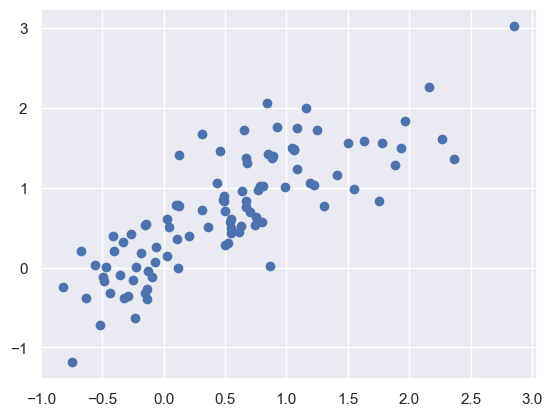

In [13]:
x = dat.T2
y = dat.PD
plt.plot(x, y, 'o')

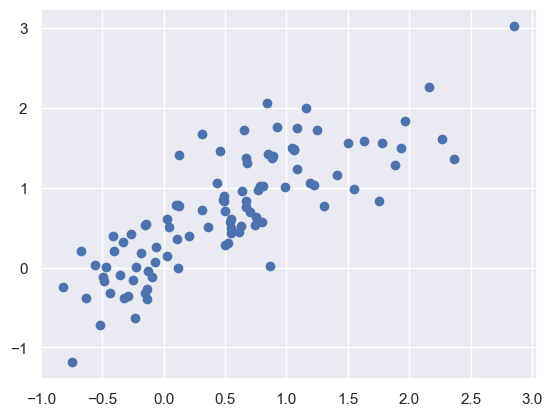

In [14]:
x = dat.T2
y = dat.PD
plt.plot(x, y, 'o')

In [15]:
b = sum(y * x) / sum(x ** 2 )
b

0.9727869856707375

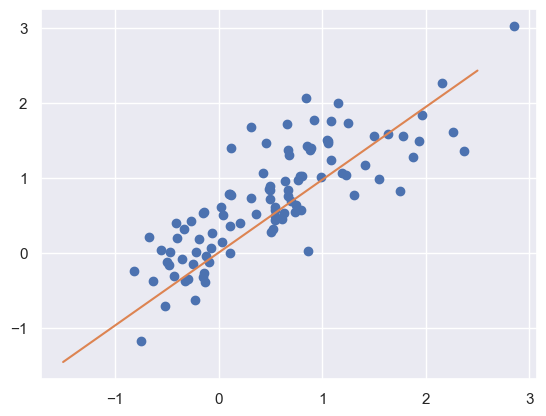

In [16]:
plt.plot(x, y, 'o')
t = np.array([-1.5, 2.5])
plt.plot(t, t * b)